In [23]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#import plotting
import os
import tensorflow as tf
import tensorflow
from qkeras.utils import load_qmodel
import time

Init_OS_path = os.environ['PATH']

In [24]:
VIVADO_DIR = "/data/Xilinx/Vivado/"

In [25]:
#This conversion script was run on correlator 4 at Fermilab
#os.environ['PATH'] = '/data/Xilinx/Vivado/2020.1/bin:' + Init_OS_path
"""I don't need the above command if I use the file run_vivado_hls.sh instead."""

BACKEND = "Vivado"

In [26]:
model = load_qmodel('noNorm_train_qkL1JetTagModel.h5')

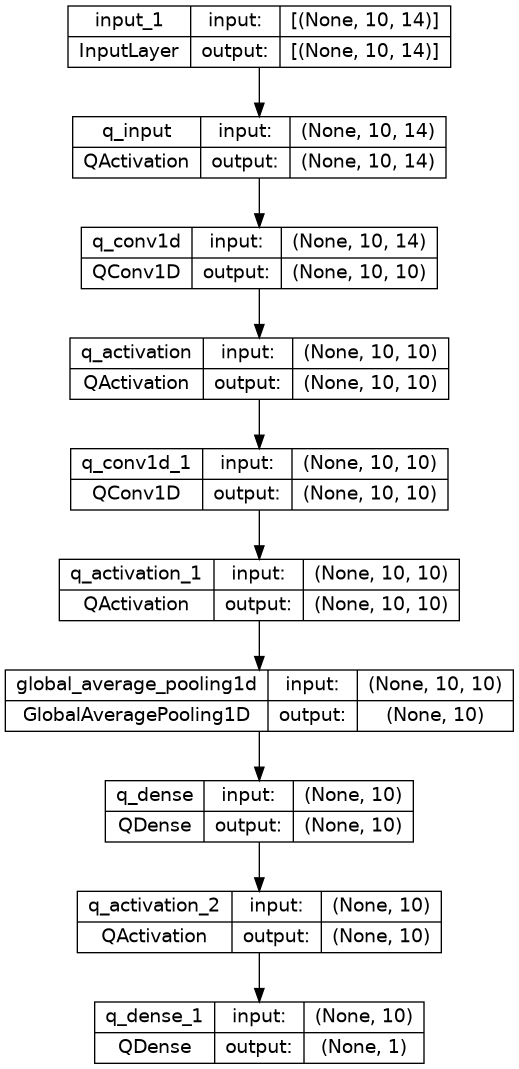

In [27]:
tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [28]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(model, 
                                            granularity='name', 
                                            backend=BACKEND,
                                            default_precision = 'fixed<14,8, AP_TRN, AP_SAT>')
print("-----------------------------------")

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

In [29]:
config["LayerName"]["input_1"]["Precision"] = "fixed<12,6,AP_TRN, AP_SAT>"

config["LayerName"]["q_input"]["Precision"] = "fixed<12,6, AP_TRN, AP_SAT>"

config['LayerName']['q_conv1d']['ReuseFactor'] = 2
config['LayerName']['q_conv1d']["Precision"]["accum"] = "fixed<14,8, AP_TRN, AP_SAT>"
config['LayerName']['q_conv1d']["Precision"]["result"] = "fixed<14,8, AP_TRN, AP_SAT>"

config["LayerName"]["q_activation"]["Precision"]["result"] = "ufixed<14,8, AP_TRN, AP_SAT>"

config['LayerName']['q_conv1d_1']['ReuseFactor'] = 2
config['LayerName']['q_conv1d_1']["Precision"]["accum"] = "fixed<16, 12, AP_TRN, AP_SAT>"
config['LayerName']['q_conv1d_1']["Precision"]["result"] = "fixed<16, 12, AP_TRN, AP_SAT>"

config["LayerName"]["q_activation_1"]["Precision"]["result"] = "ufixed<10,5, AP_TRN, AP_SAT>"

config["LayerName"]["global_average_pooling1d"]["Precision"]["accum"] = "fixed<16,12, AP_TRN, AP_SAT>"
config["LayerName"]["global_average_pooling1d"]["Precision"]["result"] = "fixed<14,8, AP_TRN, AP_SAT>"

config['LayerName']['q_dense']["Precision"]["accum"] = "fixed<14, 10, AP_TRN, AP_SAT>"
config['LayerName']['q_dense']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

config["LayerName"]["q_activation_2"]["Precision"]["result"] = "ufixed<14, 8, AP_TRN, AP_SAT>"

config['LayerName']['q_dense_1']["Precision"]["accum"] = "fixed<14, 10, AP_TRN, AP_SAT>"
config['LayerName']['q_dense_1']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

In [30]:
hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='qkmodel/hls4ml_prj',
                                                       part='xcvu13p-flga2577-2-e') #part vcu13

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

In [31]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file="hls_model.png")

In [32]:
hls_model.compile()

Writing HLS project


Done


In [33]:
print("Vivado Versions:")
!ls -1 $VIVADO_DIR
print("Edit the file run_vivado_hls.sh in this directory based on what you need.")

Vivado Versions:
2020.1
2021.2
2022.1
2022.2
2023.1
2023.2
2024.1
Edit the file run_vivado_hls.sh in this directory based on what you need.


For this line to work, you need set the correct version using the `VERSION` variable in `run_vivado_hls.sh`...

In [34]:
start_syn = time.time()
# report = hls_model.build(csim=False)
!bash run_vivado_hls.sh
end_syn = time.time()

Available Vivado versions:
2020.1
2021.2
2022.1
2022.2
2023.1
2023.2
2024.1

Chose VIVADO Version 2021.2.

Sourcing /data/Xilinx/Vivado/2021.2/settings64.sh
/data/Xilinx/Vivado/2021.2/settings64.sh: line 5: /opt/local/Xilinx/DocNav/.settings64-DocNav.sh: No such file or directory

1) Launching vivado_hls from directory /home/rmarroqu/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/qkmodel/hls4ml_prj


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2020.1 (64-bit)
  **** SW Build 2902540 on Wed May 27 19:54:35 MDT 2020
  **** IP Build 2902112 on Wed May 27 22:43:36 MDT 2020
    ** Copyright 1986-2020 Xilinx, Inc. All Rights Reserved.

source /data/Xilinx/Vivado/2020.1/scripts/vivado_hls/hls.tcl -notrace
INFO: Applying HLS Y2K22 patch v1.2 for IP revision
INFO: [HLS 200-10] Running '/data/Xilinx/Vivado/2020.1/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'rmarroqu' on host 'correlator4.fnal.gov' (Linux_x8

In [35]:
syn_time = (end_syn - start_syn)/60

In [36]:
print(f'Synthesis took {syn_time:.1f} minutes to complete.')

Synthesis took 14.6 minutes to complete.


In [46]:
try:
    hls_results = report['CSynthesisReport']
    synth = "PASSED"

#except KeyError:
except NameError: #Try the above, except if we get a KeyError. In this case, say synthesis fails
    synth = "FAILED" # sets this string if synthesis fails 


In [ ]:
#hls4ml.report.read_vivado_report('qkmodel/hls4ml_prj/')

In [38]:
parsed_report = hls4ml.report.parse_vivado_report('qkmodel/hls4ml_prj/')

Vivado synthesis report not found.
Implementation report not found.
Timing report not found.


In [39]:
csynth_report = parsed_report['CSynthesisReport']

In [40]:
for key, value in csynth_report.items():
        csynth_report[key] = float(csynth_report[key])

In [41]:
avail = ['AvailableLUT','AvailableURAM', 'AvailableFF', 'AvailableDSP', 'AvailableBRAM_18K']
used = ['LUT', 'URAM', 'FF', 'DSP', 'BRAM_18K' ]
for i in range(len(used)):
    csynth_report[used[i]] = (csynth_report[used[i]]/ csynth_report[avail[i]])*100
    del csynth_report[avail[i]]

In [42]:
categories = list(csynth_report.keys())
values = list(csynth_report.values())

In [43]:
import matplotlib.pyplot as plt

[Text(0, 0, '5.00'),
 Text(0, 0, '4.38'),
 Text(0, 0, '19.00'),
 Text(0, 0, '19.00'),
 Text(0, 0, '4.00'),
 Text(0, 0, '4.00'),
 Text(0, 0, '1.75 %'),
 Text(0, 0, '1.85 %'),
 Text(0, 0, '0.53 %'),
 Text(0, 0, '6.56 %'),
 Text(0, 0, '0.00 %')]

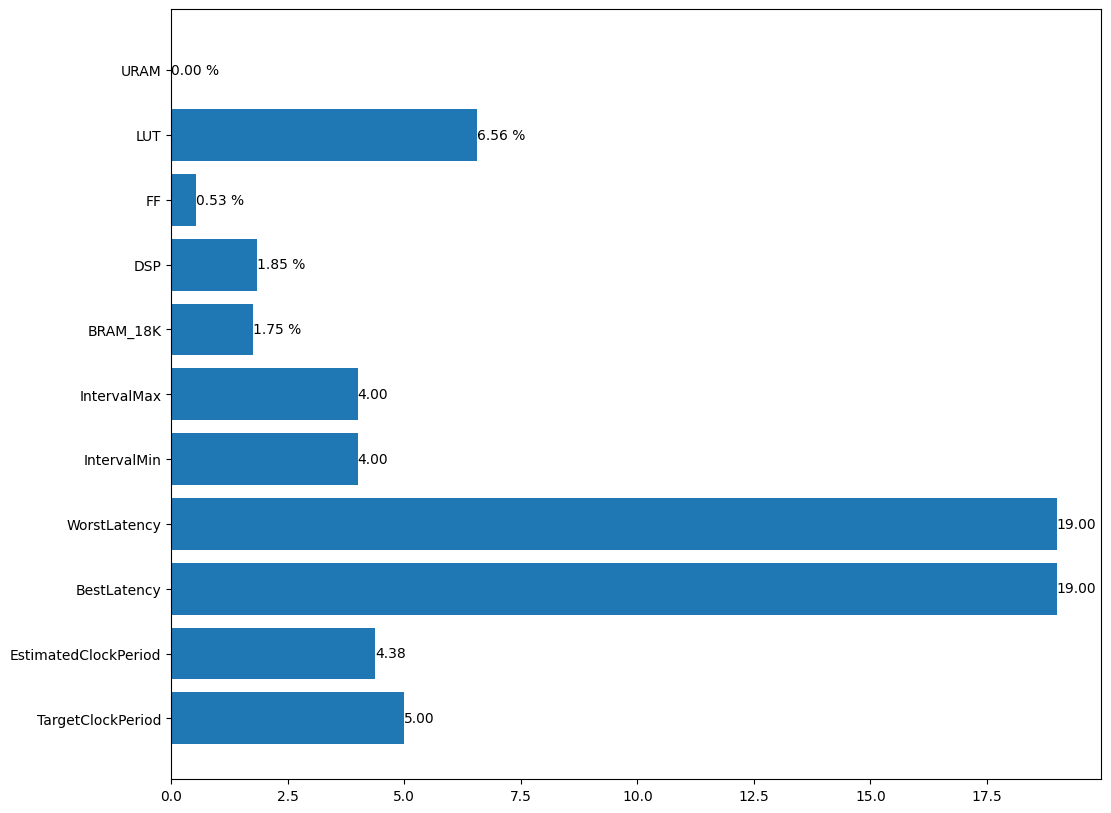

In [44]:
fig, ax = plt.subplots(figsize=(12,10))
hbars = ax.barh(categories, values, )

labels = [
    f"{csynth_report[l]:.2f} %" if l in used else f"{csynth_report[l]:.2f}"
    for l in csynth_report.keys()  # or however your bars are ordered
]

ax.bar_label(hbars, labels=labels)
#ax.grid(True)